#Leave EDA for now

In [1]:
%%capture
!pip install gdown

In [2]:
%%capture
!gdown https://drive.google.com/uc?id=1iYTFuf4DgxgYQzTQ_2da1vC9es_niPRr

In [ ]:
%%capture
!tar -xvf dataset_student.zip

In [9]:
import glob
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(f"The training set has {len(os.listdir('dataset/train'))} videos, and each video has {len(glob.glob('dataset/train/video_00000/*.png'))} frames and {len(glob.glob('dataset/train/video_00000/*.npy'))} mask file for all frames")
print(f"The validation set has {len(os.listdir('dataset/val'))} videos, and each video has {len(glob.glob('dataset/val/video_01000/*.png'))} frames and {len(glob.glob('dataset/val/video_01000/*.npy'))} mask file for all frames")
print(f"The unlabeled set has {len(os.listdir('dataset/unlabeled'))} videos, and each video has {len(glob.glob('dataset/unlabeled/video_02000/*.png'))} frames and {len(glob.glob('dataset/unlabeled/video_02000/*.npy'))} mask file for all frames")

The training set has 1000 videos, and each video has 22 frames and 1 mask file for all frames
The validation set has 1000 videos, and each video has 22 frames and 1 mask file for all frames
The unlabeled set has 13000 videos, and each video has 22 frames and 0 mask file for all frames


In [3]:
mask = np.load('dataset/train/video_00000/mask.npy')
print(f"The mask file has the shape {mask.shape}.")
img = Image.open('dataset/train/video_00000/image_0.png')
data = np.asarray(img, dtype="int32")
print(f"Each image has the shape {data.shape}")

The mask file has the shape (22, 160, 240).
Each image has the shape (160, 240, 3)


In [4]:
print("Let's visualize them:")

def get_a_random_image(dir="dataset/train"):
    all_videos = os.listdir(dir)
    picked_video = random.choice(all_videos)
    all_images = os.listdir(os.path.join(dir, picked_video))
    picked_image = random.choice(all_images)
    picked_image_idx = int(picked_image[len("image_"):-len(".png")])

    img = Image.open(os.path.join(dir, picked_video, picked_image))
    data = np.asarray(img, dtype="int32")


    mask = np.load(os.path.join(dir, picked_video, "mask.npy"))

    return data, mask[picked_image_idx]

Let's visualize them:


(-0.5, 239.5, 159.5, -0.5)

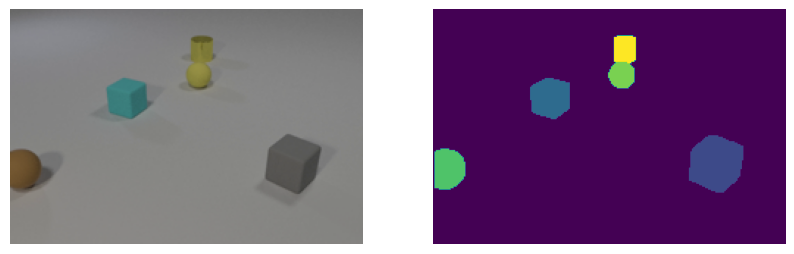

In [5]:
data, mask = get_a_random_image()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(data)
plt.axis('off')

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask)
plt.axis('off')

#Building a Model

- RAFT breakdown following https://towardsdatascience.com/optical-flow-with-raft-part-1-f984b4a33993
- feel free to update/edit as necessary

In [ ]:
def feature_encoder(img1, img2, D):
    '''CNN consisting of ~6 residual blocks and downsampling
    Operates on shared weights
    Uses instance normalization
    input: images of size 160, 240, 3; D is number of feature maps
    output: feature maps of each input image with size 20, 30, D
    '''
    return img1_fm, img2_fm

In [ ]:
def context_encoder(img1, c, h):
    '''Similar architecture to feature_encoder CNN
    Only extracts weights of img1
    Uses batch normalization
    input: image of size 160, 240, 3; c is number of context feature maps and h is number of hidden feature maps
    output:feature maps of input image with size 20, 30, c+h
    '''
    return context_hidden_fm

In [ ]:
def visual_similarity(img1_fm, img2_fm):
    '''Compute the 4D correlation of the feature maps by taking the dot product
    of feature maps for each image and summing accross all feature maps (along dim D)
    input: feature maps from the feature encoder
    output: correlation features of size
    '''
    return corr_features

In [ ]:
#optional implementation as a means to address larger pixel displacements
#w/o this visual similarity may work well for small displacements but strugger with larger ones
def correlation_pyramid(img1_fm, img2_fm):
    '''use visual similarity function and average pooling of the last two dimensions
    to get multuple levels of correlation
    Add resampling to get correlation features in the right shape for the update block
    input: feature maps from the feature encoder
    output: correlation features of size
    '''
    return corr_features

In [ ]:
#maybe break this function up more
def iterative_update(corr_features, current_flow, context_hidden_fm, warm_start=0):
    '''Recurrently update flow, then pass through a flow head
    Concat correlation features, current flow estimate, context features and hidden features
    In each iteration update the flow: new_flow = current_flow + delta_flow
    Final conv layers to resize estimate to 20, 30, 2
    Convex Upsampling to size 20, 30, (8*8)
    Obtain a weighted combination over the neighborhood and reshape to get a 20x30x2 flow field
    Warm start can be optionally implemented if we have the previously projected estimation and we'd like to start from there instead of 0
    '''
    return final_flow

In [ ]:
def training(final_flow, ground_truth):
    '''Loss is the sum of weighted l1 distances between the flow predictions and ground truth,
     with exponentially increasing weights
     '''
    return predictions

#Next steps will be to get the mask of that final image
- The performance will be evaluated by calculating the IoU between the ground truth mask and a predicted mask of the 22nd frame
- so we will need to generate a mask of the final image from our optical flow prediction - this is where Slot attention &/o Mask RCNN comes in ?
- would we want to have this portion working by 4/14 as well? seems like a stretch but otherwise, not sure it'd be worth submitting anything


